# Portfolio Optimization using cvxpy

## Install cvxpy and other libraries

## Imports

`Pip install cvxpy`

In [260]:
import cvxpy as cvx
import numpy as np

## Optimization with cvxpy

http://www.cvxpy.org/

Practice using cvxpy to solve a simple optimization problem. Find the optimal weights on a two-asset portfolio given the variance of Stock A, the variance of Stock B, and the correlation between Stocks A and B. Create a function that takes in these values as arguments and returns the vector of optimal weights, i.e., 

$\mathbf{x} = \begin{bmatrix}
x_A & x_B
\end{bmatrix}
$


Remember that the constraint in this problem is: $x_A + x_B = 1$



## Hints

### standard deviation
standard deviation $\sigma_A = \sqrt(\sigma^2_A)$, where $\sigma^2_A$ is variance of $x_A$
look at `np.sqrt()`

### covariance
correlation between the stocks is $\rho_{A,B}$

covariance between the stocks is $\sigma_{A,B} = \sigma_A \times \sigma_B \times \rho_{A,B}$

### x vector
create a vector of 2 x variables $\mathbf{x} = \begin{bmatrix}
x_A & x_B
\end{bmatrix}
$
we can use `cvx.Variable(2)`

### covariance matrix
The covariance matrix $P = 
\begin{bmatrix}
\sigma^2_A & \sigma_{A,B} \\ 
\sigma_{A,B} & \sigma^2_B 
\end{bmatrix}$

We can create a 2 x 2 matrix using a 2-dimensional numpy array
`np.array([["Cindy", "Liz"],["Eddy", "Brok"]])`

### quadratic form
We can write the portfolio variance $\sigma^2_p = \mathbf{x^T} \mathbf{P} \mathbf{x}$

Recall that the $\mathbf{x^T} \mathbf{P} \mathbf{x}$ is called the quadratic form.
We can use the cvxpy function `quad_form(x,P)` to get the quadratic form.

### objective function
Next, we want to define the objective function.  In this case, we want to minimize something.  What do we want to minimize in this case?  We want to minimize the portfolio variance, which is defined by our quadratic form $\mathbf{x^T} \mathbf{P} \mathbf{x}$

We can find the objective function using cvxpy `objective = cvx.Minimize()`.  Can you guess what to pass into this function?


### constraints
We can also define our constraints in a list.  For example, if you wanted the $\sum_{1}^{n}x = 1$, you could save a variable as `[sum(x)==1]`, where x was created using `cvx.Variable()`.

### optimization
So now that we have our objective function and constraints, we can solve for the values of $\mathbf{x}$.
cvxpy has the constructor `Problem(objective, constraints)`, which returns a `Problem` object.

The `Problem` object has a function solve(), which returns the minimum of the solution.  In this case, this is the minimum variance of the portfolio.

It also updates the vector $\mathbf{x}$.

We can check out the values of $x_A$ and $x_B$ that gave the minimum portfolio variance by using `x.value`

### Your work

Your final report should contain an optimized portfolio for your Aunt. Use the template below to assist in finding the optimal allocation of assets.


In [264]:
import cvxpy as cvx
import numpy as np

def optimize_twoasset_portfolio(varA, varB, rAB):
    """Create a function that takes in the variance of Stock A, the variance of
    Stock B, and the correlation between Stocks A and B as arguments and returns 
    the vector of optimal weights
    
    Parameters
    ----------
    varA : float
        The variance of Stock A.
        
    varB : float
        The variance of Stock B.    
        
    rAB : float
        The correlation between Stocks A and B.
        
    Returns
    -------
    x : np.ndarray
        A 2-element numpy ndarray containing the weights on Stocks A and B,
        [x_A, x_B], that minimize the portfolio variance.
    
    """
    # TODO: Use cvxpy to determine the weights on the assets in a 3-asset
    # portfolio that minimize portfolio variance.
    
    cov = np.sqrt(varA)*np.sqrt(varB)*rAB
    x = cvx.Variable(2)
    P = np.array([[varA, cov],[cov, varB]])
    objective = cvx.Minimize(cvx.quad_form(x,P))
    constraints = [sum(x)==1]
    problem = cvx.Problem(objective, constraints)
    min_value = problem.solve()    
    xA,xB = x.value   
    
    # return xA and xB    
    return xA, xB


In [265]:
"""Test run optimize_twoasset_portfolio()."""
xA,xB = optimize_twoasset_portfolio(0.1, 0.05, 0.25)
print("Weight on Stock A: {:.6f}".format(xA))
print("Weight on Stock B: {:.6f}".format(xB))

Weight on Stock A: 0.281935
Weight on Stock B: 0.718065


<h2>Optimization of a Three-Asset Portfolio</h2>

First, we will create a function to optimize a three-asset portfolio using the same library as above.

In [267]:
def optimize_threeasset_portfolio(varA, varB, varC, rABC):
    std_A = np.sqrt(varA) # Same as above, std deviation is the sqrt of the variance
    std_B = np.sqrt(varB)
    std_C = np.sqrt(varC)
    covAB = rABC['AB'] * std_A * std_B # Finding the covariance of A & B to put in matrix
    covAC = rABC['AC'] * std_A * std_C # Finding covariance of A & C to put in matrix
    covBC = rABC['BC'] * std_B * std_C # Finding covariance of B & C to put in matrix
    P = np.array([[varA, covAB, covAC], [covAB, varB, covBC], [covAC, covBC, varC]]) # establish matrix 
    X = cvx.Variable(3) # 3d vector to store weights 
    portfolio_variance = cvx.quad_form(X, P)
    constraints = [cvx.sum(X) == 1, X>=0.25]
    problem = cvx.Problem(cvx.Minimize(portfolio_variance), constraints)
    problem.solve()
    return np.array(X.value) # this is all the same as the above

varA = 0.1 # Setting weight of Stock A
varB = 0.05 # Setting weight of Stock B
varC = 0.15 # Setting weight of Stock C
rABC = {'AB': 0.25, 'AC': 0.15, 'BC': 0.10} # 2x2 covariance for each of the stocks, AxB, AxC, BxC. Stored in dictionary for easier use later

xA, xB, xC = optimize_threeasset_portfolio(varA, varB, varC, rABC)
print("Optimal Weight of Stock A: {:.6f}".format(xA))
print("Optimal Weight of Stock B: {:.6f}".format(xB))
print("Optimal Weight of Stock C: {:.6f}".format(xC))
print("The sum of the optimal weights of Stocks A, B, and C is: " + str(xA + xB + xC))    

Optimal Weight of Stock A: 0.250000
Optimal Weight of Stock B: 0.500000
Optimal Weight of Stock C: 0.250000
The sum of the optimal weights of Stocks A, B, and C is: 1.0


The function appears to be successful. It limits the allocation of any asset to >=0 (we are not concerned with shorting assets at this moment). 

If this were used for portfolio building, the principal is that we would make up our portfolio with ~21.7297% in asset A, ~60.6405% in asset B, and ~17.629% in asset C. 

<h1>Task</h1>

Your Aunt has approached you and has asked you to manage her portfolio. She is a 55-year old medical doctor living in Limerick with her husband, a lecturer at the local university. They have two grown children who are both graduated and working in Dublin. Your Aunt and her husband have paid their mortgage fully. Their house's estimated to be worth €375,000. The couple earns €215,000 per annum gross of taxes. They have €165,000 in cash savings and no other assets. They both plan to retire in 10 years and downsize their residence to an apartment in Limerick, and they would like to buy an apartment in Barcelona as a Winter retreat. They would like an income from a portfolio to augment their pensions when they retire. Create a suitable portfolio of assets (excluding property) that aligns with their investment goals. 

The portfolio should contain at least two stocks, and one bond and these assets should trade in at least two currencies. The selection of the assets should be based on a fundamental analysis of the issuing entity and 
a qualitative analysis of the entity and the market in which the entity operates. Your asset selection should be complementary and collectively meet the individual's investment goals. Analysis, discussion and asset choice should be contained within a Python notebook. The notebook should contain a report of a minimum of 1500 words, graphs, and any other analytics performed on this task. Please also ensure that the portfolio is well-optimized using portfolio optimization theory.

<h2>Retirement Investment Portfolio - Outline</h2>

Initially, my Aunt has provided me with this information:\
    **1. Cash Savings:** €165,000\
    **2. Yearly Income (Gross of Taxes):** €215,000\
    **3. House Value:** €375,000\
    **4. Retirement Plan Period:** 10 Years

Plans for future:\
**1. Sell house**\
**2. Buy apartment in Limerick**\
**3. Buy apartment in Barcelona**\
**4. Have investment portfolio augment their pensions**

To best optimize the portfolio for their needs, the portfolio that we are looking to build should be overall stable, providing enough returns to supplement their pension earnings. We will achieve this through occasionally selling stock, but also through dividends and bond payments. Our portfolio will be made up of 60% in equities (NASDAQ stocks, trading in $), 25% bonds (Europe bond ETFs, trading in €), and 15% held in cash in a high-yield savings account (for emergencies, quick spending). By dividing up the portfolio between stocks/bonds and trading in US Dollars/Euros, we are offering a solid risk mitigation strategy to offer more security in their retirement.

So, our optimal portfolio will be:

1. Equity (60%)
    - Divided up into 3 different stocks for growth, stability, and risk mitigation. The weights of these stocks will be analyzed further in the report.
    - These stocks will trade in USD ($) and Euro (€).
    - A majority of the stock equity will be in diversified index funds (S&P500, STOXX EU 600) for risk mitigation.
    - A portion of the stock equity will be in a single asset (growth stock).
2. Bond ETFs (25%)
    - 25% of the portfolio will be made up in a Eurozone Bond ETF.
    - The bonds will trade in Euro (€)
    - The bonds are very stable providing low risk return over a long time frame.
3. Cash Savings (15%)
    - 15% of the portfolio will be made up of cash, split between a short-term savings account and a long-term savings account.
  

<h2>Analysis on Stocks</h2>
To determine what stocks will make up the stock portion of the portfolio, we will do an analysis to help pick 3 different stocks. We are going to select some growth stocks (e.g., Amazon, Meta) that are volatile but offer the potential for higher returns, some more consistent stocks (e.g., Johnson & Johnson) that are historically good performers, and we are also going to choose the S&P 500, STXE 600 to offer further diversification and stability on the portfolio. As the portfolio should supplement the retirement pension, we aim to get modest but consistent returns. In total, the analysis will be done on:

1. **Amazon** (Ticker: AMZN)
2. **Johnson & Johnson** (Ticker: JNJ)
3. **Nvidia** (Ticker: NVDA)
4. **STXE 600** (Ticker: \^STOXX)
5. **Meta** (Ticker: META)
6. **S&P 500** (Ticker: \^GSPC)

We will look at information for the last 10 years to help determine what stocks will most strongly align with our investment goals (consistent performance, stable).

In [272]:
# Imports for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas_ta as ta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

tickers = ['AMZN', 'JNJ', '^STOXX', '^NDX', 'META', '^GSPC'] # setting tickers
stocks_df = yf.download(
    tickers,
    start='2014-01-01', 
    end = '2024-12-01',
    progress=False) 

stocks_df.head()

Price                      Adj Close                                     \
Ticker                          AMZN        JNJ       META        ^GSPC   
Date                                                                      
2014-01-02 00:00:00+00:00  19.898500  67.211334  54.545773  1831.979980   
2014-01-03 00:00:00+00:00  19.822001  67.816788  54.396221  1831.369995   
2014-01-06 00:00:00+00:00  19.681499  68.171196  57.028294  1826.770020   
2014-01-07 00:00:00+00:00  19.901501  69.618362  57.746132  1837.880005   
2014-01-08 00:00:00+00:00  20.096001  69.522385  58.055202  1837.489990   

Price                                                   Close             \
Ticker                            ^NDX      ^STOXX       AMZN        JNJ   
Date                                                                       
2014-01-02 00:00:00+00:00  3563.570068         NaN  19.898500  91.029999   
2014-01-03 00:00:00+00:00  3538.729980  327.640015  19.822001  91.849998   
2014-01-06 00:00:00+00:00  3526.959961  326.980011  19.681499  92.330002   
2014-01-07 00:00:00+00:00  3557.850098  329.399994  19.901501  94.290001   
2014-01-08 00:00:00+00:00  3567.540039  329.750000  20.096001  94.160004   

Price                                              ...       Open  \
Ticker                          META        ^GSPC  ...       META   
Date                                               ...              
2014-01-02 00:00:00+00:00  54.709999  1831.979980  ...  54.830002   
2014-01-03 00:00:00+00:00  54.560001  1831.369995  ...  55.020000   
2014-01-06 00:00:00+00:00  57.200001  1826.770020  ...  54.419998   
2014-01-07 00:00:00+00:00  57.919998  1837.880005  ...  57.700001   
2014-01-08 00:00:00+00:00  58.230000  1837.489990  ...  57.599998   

Price                                                                Volume  \
Ticker                           ^GSPC         ^NDX      ^STOXX        AMZN   
Date                                                                          
2014-01-02 00:00:00+00:00  1845.859985  3575.600098         NaN  42756000.0   
2014-01-03 00:00:00+00:00  1833.209961  3564.939941  326.140015  44204000.0   
2014-01-06 00:00:00+00:00  1832.310059  3539.020020  327.100006  63412000.0   
2014-01-07 00:00:00+00:00  1828.709961  3539.290039  327.230011  38320000.0   
2014-01-08 00:00:00+00:00  1837.900024  3558.300049  329.529999  46330000.0   

Price                                                                          \
Ticker                            JNJ        META         ^GSPC          ^NDX   
Date                                                                            
2014-01-02 00:00:00+00:00   5919600.0  43195500.0  3.080600e+09  1.738820e+09   
2014-01-03 00:00:00+00:00   5637600.0  38246200.0  2.774270e+09  1.667480e+09   
2014-01-06 00:00:00+00:00   7443500.0  68852600.0  3.294850e+09  2.292840e+09   
2014-01-07 00:00:00+00:00  11063300.0  77207400.0  3.511750e+09  2.278220e+09   
2014-01-08 00:00:00+00:00   9096700.0  56682400.0  3.652140e+09  2.345220e+09   

Price                                   
Ticker                          ^STOXX  
Date                                    
2014-01-02 00:00:00+00:00          NaN  
2014-01-03 00:00:00+00:00  220228300.0  
2014-01-06 00:00:00+00:00  194489900.0  
2014-01-07 00:00:00+00:00  344684700.0  
2014-01-08 00:00:00+00:00  378094300.0  

[5 rows x 36 columns]

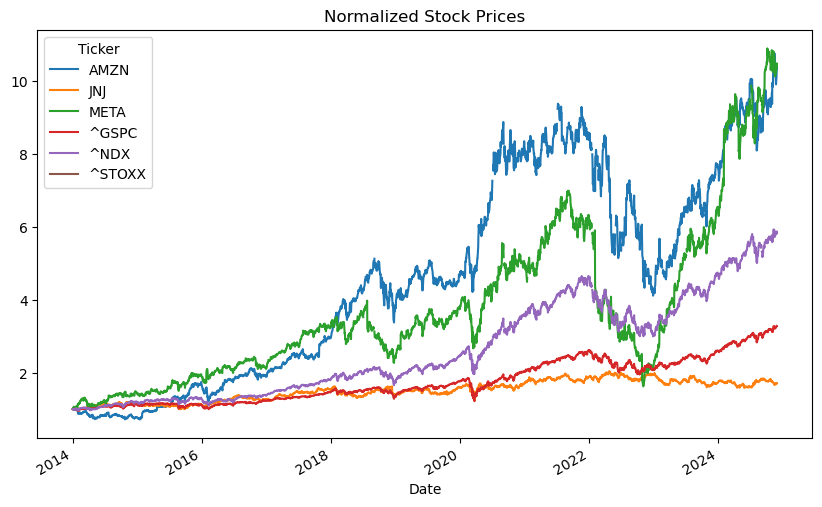

In [273]:
def normalize(df):
    return df/df.iloc[0,:]

normalized_stock_data = normalize(stocks_df)
normalized_stock_data['Close'].plot(title='Normalized Stock Prices', figsize=(10, 6))
plt.savefig('Normalized Close Prices of Stock.png', dpi=300, bbox_inches='tight')

individual_stocks = {} # Dictionary to store the individual dataframes for each of the stocks so we can perform individual analysis
                          
for ticker in tickers:
    individual_stocks[ticker] = stocks_df['Close'][ticker].dropna().to_frame(name='Close')

amzn_df = individual_stocks['AMZN']
jnj_df = individual_stocks['JNJ']
nasdaq_df = individual_stocks['^NDX']
meta_df = individual_stocks['META']
stoxx_df = individual_stocks['^STOXX']
sp500_df = individual_stocks['^GSPC']

**Linear Regression Function for Stock Analysis**

Creating a function to call on each of the stocks and to use in future reference. We look at a long-term trend indicator (EMA = 200) for the portfolio as we're looking to ensure the retirement pension is most aligned for long-term returns.

In [275]:
def ema_regression_df(stock_dataframes):
    results = [] # going to store a results table for the values we calc
    fig, axes = plt.subplots(6, 2, figsize=(20, 30))  # 6 rows, 2 columns
    axes = axes.flatten()
    for i, (stock_name, df) in enumerate(stock_dataframes.items()): # loop through each stock dataframe
        # Compute EMA
        df['EMA_200'] = df['Close'].ewm(span=200, adjust=False).mean()
        ax_ema = axes[i * 2] # start plotting the EMA vs Close Price 
        ax_ema.plot(df.index, df['Close'], label='Close Price', alpha=0.8)
        ax_ema.plot(df.index, df['EMA_200'], label='EMA_200', alpha=0.8, linestyle='--')
        ax_ema.set_title(f"{stock_name} - Close vs EMA_200")
        ax_ema.set_xlabel('Date')
        ax_ema.set_ylabel('Price')
        ax_ema.legend()
        y = df['Close'].dropna() # Linear Regression model
        x = df['EMA_200'].dropna().values.reshape(-1, 1)

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

        linearReg = LinearRegression()
        linearReg.fit(x_train, y_train)

        y_pred = linearReg.predict(x_test)
        
        results.append({ # adding results to our table for each loop over stock dataframe
            'Stock': stock_name,
            'Coefficient': linearReg.coef_[0],
            'Mean Absolute Error': mean_absolute_error(y_test, y_pred),
            'R² Score': r2_score(y_test, y_pred)
        })

        ax_reg = axes[i * 2 + 1]
        ax_reg.scatter(x_test, y_test, color='blue', label='Actual Data')
        ax_reg.plot(x_test, y_pred, color='black', label='Best Fit Line')
        ax_reg.set_title(f"{stock_name} - Linear Regression")
        ax_reg.set_xlabel('EMA_200')
        ax_reg.set_ylabel('Close Price')
        ax_reg.legend()

    plt.tight_layout()
    plt.show()
    results_df = pd.DataFrame(results)
    print(results_df)


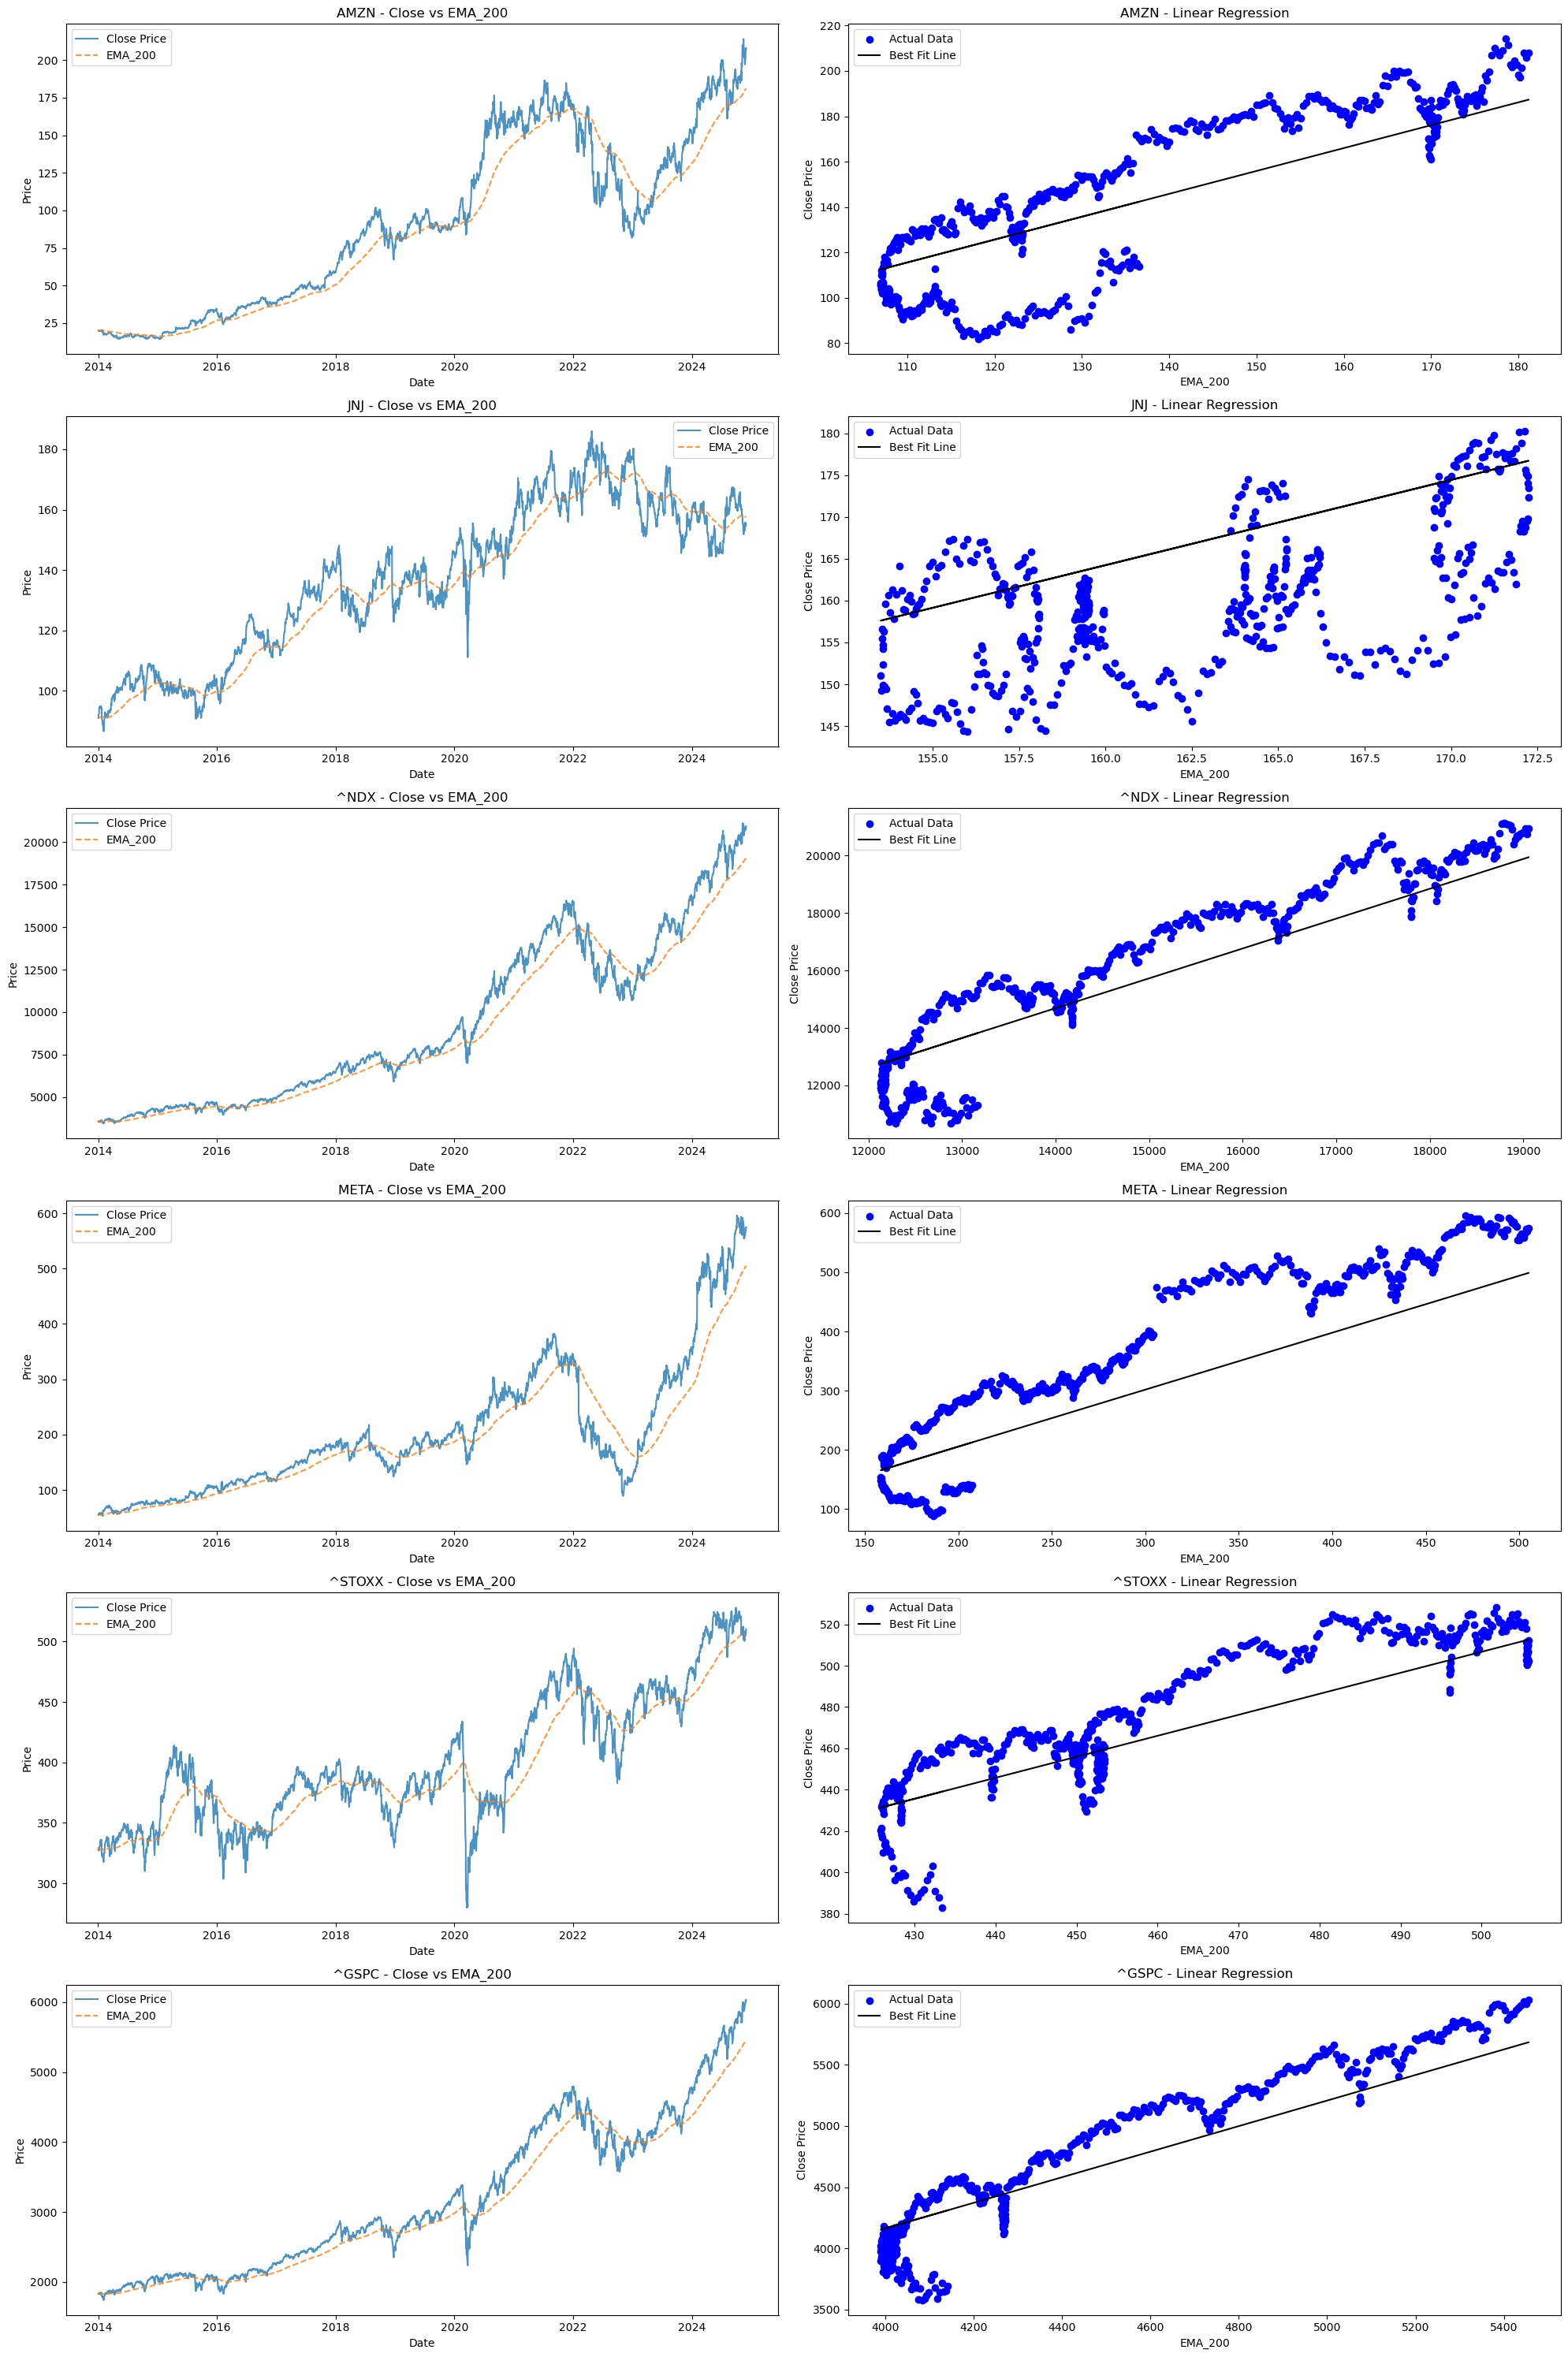

    Stock  Coefficient  Mean Absolute Error  R² Score
0    AMZN     1.008288            16.816780  0.703024
1     JNJ     1.019402             7.754562 -0.310596
2    ^NDX     1.037735          1024.555267  0.843344
3    META     0.961890            71.599376  0.723805
4  ^STOXX     1.015463            14.099802  0.733462
5   ^GSPC     1.045645           213.822748  0.854669


In [276]:
stock_dataframes = { # setting up dict to loop the EMA function for. I wanted these represented side by side for better comparison.
    'AMZN':amzn_df,
    'JNJ': jnj_df,
    '^NDX': nasdaq_df,
    'META': meta_df,
    '^STOXX': stoxx_df,
    '^GSPC':sp500_df
}

ema_regression_df(stock_dataframes)

Based on the modeling, the three stocks I am going to choose for my Aunt's portfolio are Amazon (Ticker: AMZN), STOXX Europe 600 (Ticker: ^STOXX), and the S&P500 (Ticker: ^GSPC).

The model performed well with the STOXX Europe 600, with a low MAE and high R^2 score, indicating a stable and predictable growth pattern. This will provide our portfolio with diversity, as the STOXX Europe 600 is similar to the S&P 500 in that the STOXX Europe 600 is an index of the top 600 companies in the Eurozone. We are adding this to our portfolio for predicted returns and risk mitigation through diversity, so our stock trades in multiple currencies and is not dependent on a single currency (e.g., Euro or USD).

The second selection will be the S&P 500, backed by the high R^2 score. This will let us better predict future returns with this model. The S&P 500 is an index of the 500 largest US stock exchange companies - giving us a large portfolio spread in the US stock market. It is a consistent performer.

The final selection is Amazon - with a low MAE and a high R^2 score, we can use this to predict returns. A growth-focused stock choice, it is more volatile than the other two, with greater exposure to individual market fluctuations in the tech sector. We aim to get long-term growth.

<h2>Bonds (25% of Portfolio)</h2>

We will put 25% of the portfolio capital in bond ETF, specifically the iShares Core € Govt Bond UCITS ETF EUR (Ticker: EUNH.DE) to further diversify the portfolio. The iShares Govt Bond ETF trades in Euro and investment-grade government bonds in the Eurozone (e.g. countries with Euro as main currency).

This further diversifies our risk as it reduces the risk of a single country event impacting the value (e.g. war, famine, civil war), and it is credited by the Euro and therefore more secure. 

The expected return from this bond is found as the following.

In [279]:
ticker = 'EUNH.DE'
bond_data = yf.download(ticker, start='2014-01-01', end='2024-12-01', progress=False)['Adj Close']
daily_returns = bond_data.pct_change().dropna()
est_bond_return = daily_returns.mean().values[0] * 252
daily_std_dev = daily_returns.std().values[0]
bond_annual_std = daily_std_dev * (252 ** 0.5) 
print(f"Expected Yearly Return for {ticker}: {est_bond_return * 100:.2f}%")
print(bond_annual_std)

Expected Yearly Return for EUNH.DE: 1.45%
0.053042116390805416


<h2>Cash Reserve (15% of Portfolio)</h2>

Per the initial plan, we are going to keep 15% of the portfolio as cash, with 50% of the cash in a high-yield savings account (for long term, yet liquid spending options) and 50% of the cash in a fixed-term deposit account.

Bank of Ireland information on the two accounts:

1. **Savings Account**
    - Monthly savings up to €2,500.
    - Instant access to withdraw for emergencies/short-term spending.
    - 3% AER for first year, then 2% AER after.
2. **Fixed-Term Deposit Account**
    - €5,000 minimum lodgement (no maximum).
    - For 18 month term, 2.98% AER.

**Cash Plan**
Put €12,375 of saved cash in a fixed-term deposit account (50% of cash, which makes up 15% of the portfolio of €165,000).

Open a savings account. Deposit €2,500 per quarter in the year 2025 until we have €12,500 (from leftover cash reserves). The following is an analysis of cash flow over the next 10 years to show the trend.

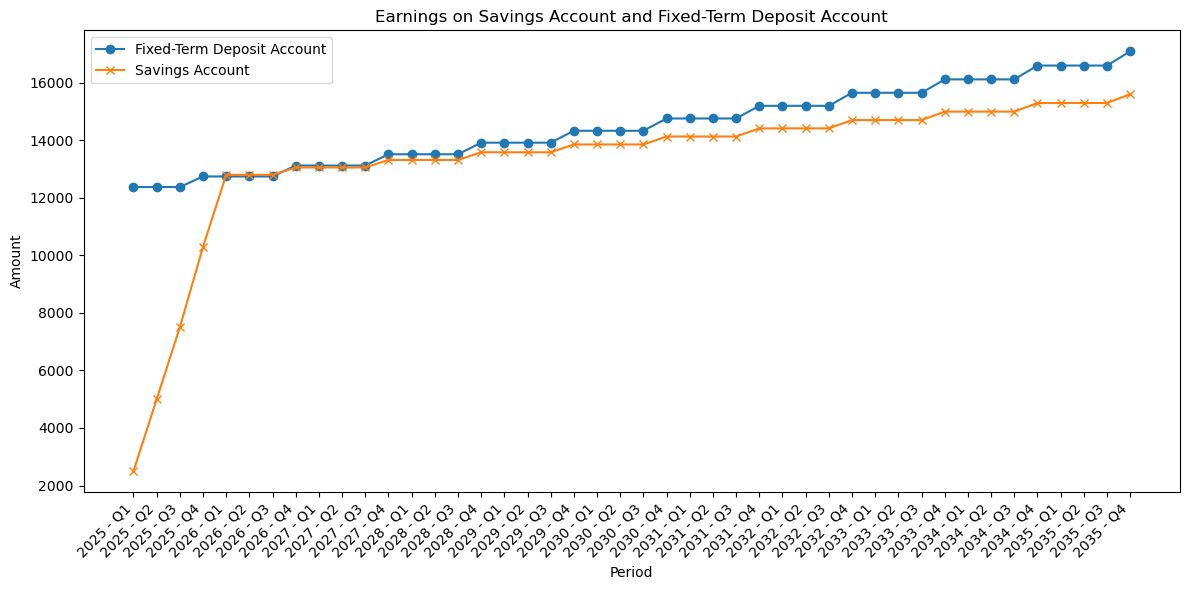

In [281]:
file_path = 'Savings Account vs Fixed Term Deposit Account.xlsx'  # load in excel file
data = pd.read_excel(file_path)
x_labels = data['Period'] # setting X axis to be the period
x_positions = np.arange(len(x_labels))
plt.figure(figsize=(12, 6))
plt.plot(x_positions, data['Monthly Fixed-Term Deposit Account'], label='Fixed-Term Deposit Account', marker='o') # plot the deposit account first
plt.plot(x_positions, data['Savings Account'], label='Savings Account', marker='x') # plot savings account
plt.xticks(x_positions, x_labels, rotation=45, ha='right') # rotate labels since they're long
plt.xlabel('Period')
plt.ylabel('Amount')
plt.title('Earnings on Savings Account and Fixed-Term Deposit Account')
plt.legend()
plt.tight_layout()
plt.show()

<h2>Weight Optimization and Further Analysis on Stocks</h2>

We are going to use the functions to optimize the weights of our three stocks. We will also calculate the expected return and overall risk for every component in the portfolio.

In [283]:
# Define stock tickers
tickers = ['AMZN', '^GSPC', '^STOXX']

# Download stock data
data = yf.download(tickers, start='2014-01-01', end='2024-12-01', progress=False)['Adj Close']
data = data.dropna()

# Calculate returns and statistics
returns = data.pct_change().dropna()
annualized = returns.mean() * 252
covariance_matrix = returns.cov() * 252

# Fixed expected returns and risks for bonds and cash
bond_return = est_bond_return  # found from the code above
bond_risk = bond_annual_std    # same
cash_return = 0.3144/10  # from chart loaded above, 31.44% gain in 10 years so ~ 3.144% a year
cash_risk = 0.0     # 0% risk for cash

def optimize_portfolio(expected_returns, covariance_matrix, risk_aversion=1): # Code from original cvx modified slightly, we want >=10% weights
    n = len(expected_returns)
    weights = cvx.Variable(n)
    portfolio_return = weights @ expected_returns
    portfolio_risk = cvx.quad_form(weights, covariance_matrix)
    obj = cvx.Maximize(portfolio_return - risk_aversion * portfolio_risk)
    constraints = [cvx.sum(weights) == 1, weights >= 0.10]  # No negatives, each weight >= 10%
    problem = cvx.Problem(obj, constraints)
    problem.solve()
    return weights.value

optimal_weights = optimize_portfolio(annualized, covariance_matrix, risk_aversion=6) # Risk aversion of 6 per Ario's code

stored_weights = {} # set a dict to store the weight values for the stock
for i in range(len(tickers)):
    ticker = tickers[i]
    weight = optimal_weights[i]
    stored_weights[ticker] = weight
    
for x, y in stored_weights.items(): # Print out for readability 
    print(f"{x} Optimal Weight: {y*100:.2f}%")
    
stock_portfolio_return = np.dot(optimal_weights, annualized)
stock_portfolio_variance = np.dot(optimal_weights, np.dot(covariance_matrix, optimal_weights))
stock_portfolio_risk = np.sqrt(stock_portfolio_variance)
stock_weight = 0.6  # 60% of the portfolio is stock
bond_weight = 0.25  # 25% is the bond
cash_weight = 0.15  # 15% is cash in savings accounts

# Now we are going to add everything up. I wanted to separate this as I knew I wanted 60/25/15 stock/bond/cash split from the start, which made the
# calculations a bit difficult, but I got it working in the end.
overall_portfolio_return = (
    stock_weight * stock_portfolio_return +
    bond_weight * bond_return +
    cash_weight * cash_return
)

# Same as above, we use the formula and just add up the risks for each segment to get overall portfolio risk

overall_portfolio_risk = np.sqrt(
    (stock_weight**2 * stock_portfolio_risk**2) +
    (bond_weight**2 * bond_risk**2) +
    (cash_weight**2 * cash_risk**2)  # Cash has zero risk
)

print(f"\nExpected Portfolio Return: {overall_portfolio_return * 100:.2f}%")
print(f"Portfolio Risk (Standard Deviation): {overall_portfolio_risk * 100:.2f}%")
print("This return/risk includes the cash/bonds which are found below.")

AMZN Optimal Weight: 13.90%
^GSPC Optimal Weight: 50.13%
^STOXX Optimal Weight: 35.98%

Expected Portfolio Return: 8.18%
Portfolio Risk (Standard Deviation): 9.79%
This return/risk includes the cash/bonds which are found below.


So from our calculations, we have found the optimal weights for our 3 stocks within the 60% of portfolio bracket. That is, we have now determined:

1. Stock Breakdown (60% of Portfolio)
   - Amazon - 13.90% ~ 8.34% of overall portfolio
   - S&P 500 - 50.13% ~ 30.078% of overall portfolio
   - Euro STOXX 600 - 35.98% ~ 21.588% of overall portfolio
2. Bond Breakdown (25% of Portfolio)
   - iShares Core € Govt Bond UCITS ETF - 100% ~ 25% of overall portfolio
3. Cash Breakdown (15% of Portfolio)
   - Short-term savings account - 50% ~ 7.5% of overall portfolio
   - Long-term deposit account - 50% ~ 7.5% of overall portfolio
  
Which, when everything is considered, gives us an expected portfolio return of **8.18%**, and a risk percentage of **9.79%**.

This is an average of €1,120 per month in additional income during retirement, which should augment their pension well. 

<h2>Allocating Portfolio Capital</h2>
We will now do the allocating of the capital we have, €165,00, and determine the number of shares/capital in each asset. For simplicity we will use todays currency exchange values for EUR -> USD (€1 = $1.05)

In [286]:
capital_sum = 165000
savings = capital_sum * 0.15
bond = capital_sum * 0.25
stock = capital_sum * 0.6

print(f"Total Allocated to Savings (EUR) (15%): €{savings:,.2f}")
print(f"Total Allocated to Stocks (EUR) (60%): €{stock:,.2f}")
print(f"Total Allocated to Bond ETF (EUR) (25%): €{bond:,.2f}")

Total Allocated to Savings (EUR) (15%): €24,750.00
Total Allocated to Stocks (EUR) (60%): €99,000.00
Total Allocated to Bond ETF (EUR) (25%): €41,250.00


<h3>Stock Allocation Breakdown</h3>

In [288]:
amazon_stock = (stock * 1.05) * (stored_weights['AMZN'])  # Converting to USD
sp500_stock = (stock * 1.05) * (stored_weights['^GSPC'])  # Converting to USD
stoxx_stock = stock * (stored_weights['^STOXX'])  # Staying in EUR
print(f"Amazon Stock (USD): ${amazon_stock:,.2f}")
print(f"S&P 500 Stock (USD): ${sp500_stock:,.2f}")
print(f"STOXX Stock (EUR): €{stoxx_stock:,.2f}")

Amazon Stock (USD): $14,444.92
S&P 500 Stock (USD): $52,108.09
STOXX Stock (EUR): €35,616.18


<h3>Expected Return on Portfolio (yearly)</h3>

This is an average of €1,120 per month in additional income during retirement, which should augment their pension well.

<h2>Risk Analysis</h2>


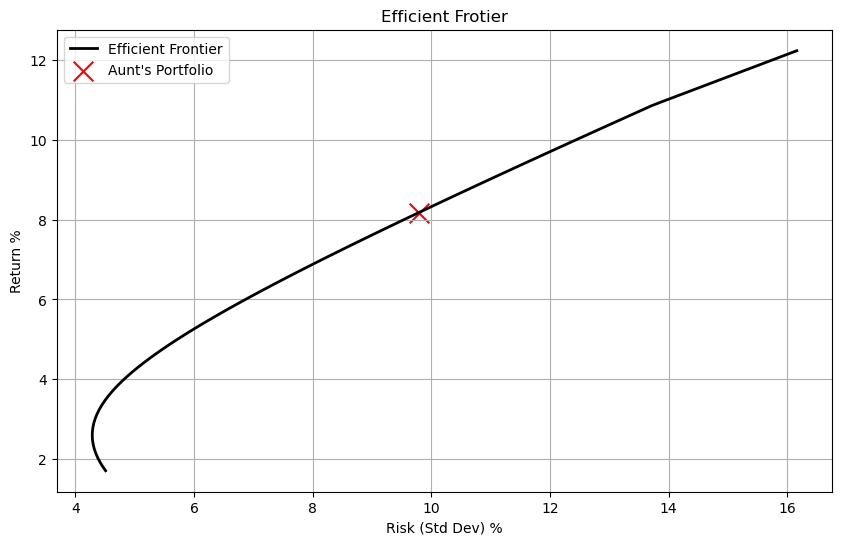

In [292]:
points = 1000 # for the line
f_returns = [] # list to store the returns
f_risks = [] # list to store the risks

for w_stock in np.linspace(0, 60, num_points):  # stock weight of portfolio is 60%
    w_bond = 25 # bond weight of portfolio is 25%
    w_cash = 15 # cash weight of portfolio is 15%

    portfolio_return = ( # same functions as above
        w_stock * stock_portfolio_return +
        w_bond * bond_return +
        w_cash * cash_return
    )
    portfolio_risk = np.sqrt(
        (w_stock**2 * stock_portfolio_risk**2) +
        (w_bond**2 * bond_risk**2) +
        (w_cash**2 * cash_risk**2)
    )

    f_returns.append(portfolio_return) # add to list
    f_risks.append(portfolio_risk) # add to list

f_returns = np.array(frontier_returns) # turn into array for plotting
f_risks = np.array(frontier_risks) # turn into array for plotting

plt.figure(figsize=(10, 6))
plt.plot(f_risks * 100, f_returns * 100, label='Efficient Frontier', color='black', linewidth=2)
plt.scatter(overall_portfolio_risk * 100, overall_portfolio_return * 100, color='red', marker='x', s=200, label="Aunt's Portfolio")
plt.title('Efficient Frotier')
plt.xlabel('Risk (Std Dev) %')
plt.ylabel('Return %')
plt.legend()
plt.grid(True)
plt.show()

<h1>Summary</h1>

For this investment portfolio, made up of US Stocks, EU Stocks, a Bond ETF, and cash savings, we are expecting a portfolio return of 8.18%, and a risk percentage of 9.79%. 

Our portfolio appears to be on the efficient frontier line balancing risk vs return. For a retirement portfolio, this should do well to augment my Aunt's pension.

The portfolio provides an opportunity for more returns in the future with a growth stock like Amazon while also having consistent, well-performing stocks in the S&P500 and EU STOXX 600. Diversification across industries will stabilize the portfolio, and diversification across US/EU companies will also contribute. 

The bond ETF is a stable and solid way of holding onto capital value and offering returns in the form of interest payments. The cash savings will present modest growth while also giving liquidity in the event of emergencies or short-term spending.

The decision to divide the portfolio amongst EU and USA assets was intentional to stabilize the portfolio better. Since my Aunt likely has a pension that mostly invests in EU assets, a strong US base for this portfolio helps balance this out. 

Overall, the portfolio should suit my aunt's needs well to augment her pension and provide stable and consistent growth throughout their retirement.

<h2>Credits</h2>
Thank you to Ronan and Ario for code/report example. I looked at both of theirs when preparing my report. 